In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

Найдем априорное распределение, при котором $P(-0.5 < \theta < 0.5) = 0.95$:

$P(-\frac{0.5}{\sigma_0} < \frac{\theta}{\sigma_0} < \frac{0.5}{\sigma_0}) = 0.95$

$P(-z < \frac{\theta}{\sigma_0} < z) = 0.95$, где $z$ - квантиль стандартного нормального распределения уровня $\frac{1+0.95}{2}$

Следовательно, $\frac{0.5}{\sigma_0} = z$, откуда $\sigma^2_0 = \frac{1}{4z^2}$.

In [2]:
N = 100

sample = sps.norm.rvs(loc=0, scale=1, size=N)

q = (1.0 + 0.95) / 2
z = sps.norm.ppf(q) # квантиль уровня q

var = 1 / (4 * (z ** 2))


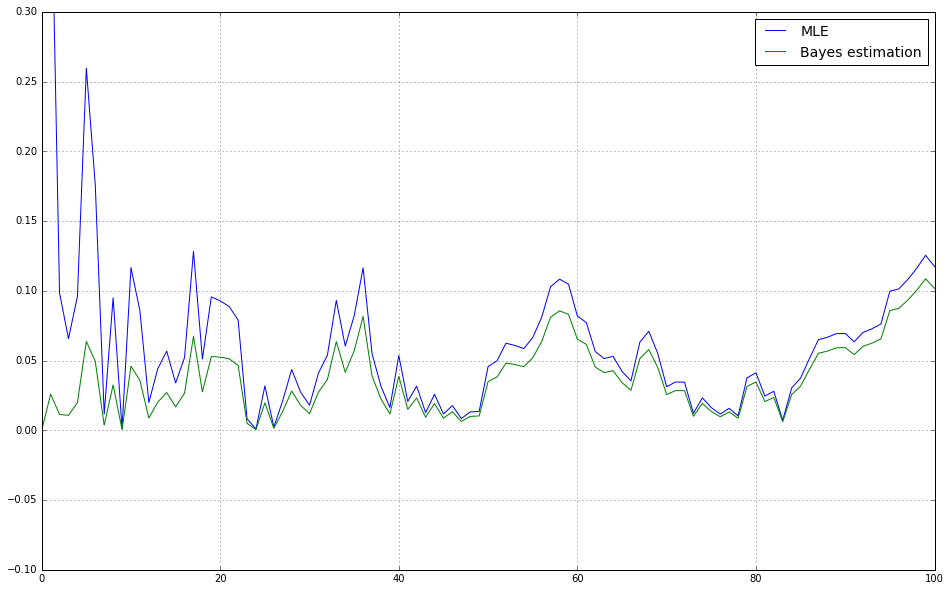

In [5]:
plt.figure(figsize=(16, 10))

# Оценка методом максимального правдоподобия
max_likelihood_estimation = [abs(sample[:n].mean()) 
                             for n in range(1, N + 1)]
plt.plot(range(1, N + 1), max_likelihood_estimation, label='MLE')

# Байесовская оценка
bayes_estimation = [abs(sample[:n].sum() / (1. / var + n)) 
                    for n in range(0, N + 1)]
plt.plot(range(0, N + 1), bayes_estimation, label='Bayes estimation')

plt.ylim(-0.1, 0.3)
plt.grid()
plt.legend(fontsize=14)
plt.show()

На графике видно что байесовская оценка ведет себя немного лучше чем оценка, полученная методом максимального правдоподобия.